# Car Price Prediction

In [1]:
# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Reading the data and converting into DataFrame

In [4]:
df = pd.read_csv('car_data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Exploring

In [6]:
# Checking null values

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
# There are no null values

In [9]:
df.shape

(301, 9)

In [10]:
# There are 301 records and 9 fields

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
# Statistical information of the data

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
# We will check the correlation between each variable

<Axes: >

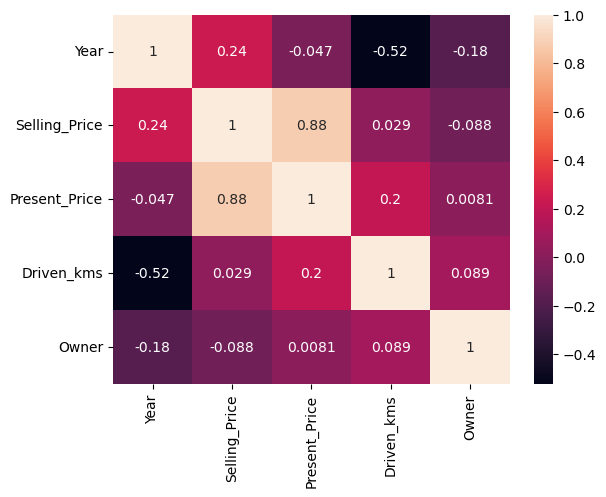

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
## Checking unique values in each column
for col in df.columns:
    print(df[col].value_counts())
    print('*'*50)

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
**************************************************
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64
**************************************************
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64
**************************************************
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1


In [17]:
for col in df.columns:
    print(df[col].unique())
    print('*'*50)

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

### Preparing Data Set for Model Training

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
# Car Name feature is not important here so we will drop the car name feature

In [20]:
df = df.drop(labels='Car_Name',axis=1)

In [21]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
# Now we will Seprate our Dependent and Independent Feature

In [23]:
# Selling Price is our Independent Feature which we will predict

# Remaining Features our Dependent Feature

Notation

X is our Dependent Feature

y is our Independent Feature

In [24]:
X = df.drop(labels='Selling_Price',axis=1)

In [25]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
y = df[['Selling_Price']]

In [27]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


### Now we will perform feature scaling and feature encoding

In [28]:
## We will perform feature Scaling to numerical columns

In [29]:
num_cols = [num_cols for num_cols in X.columns if X[num_cols].dtypes != 'O']

In [30]:
num_cols

['Year', 'Present_Price', 'Driven_kms', 'Owner']

In [31]:
cat_cols = [cat_cols for cat_cols in X.columns if X[cat_cols].dtypes == 'O']

In [32]:
cat_cols

['Fuel_Type', 'Selling_type', 'Transmission']

In [33]:
sc = StandardScaler()

In [34]:
X_scaled = sc.fit_transform(X[num_cols])

In [35]:
X_scaled_df = pd.DataFrame(X_scaled,columns=num_cols)

In [36]:
X_scaled_df

,Year,Present_Price,Driven_kms,Owner
0,0.128897,-0.236256,-0.256224,-0.174501
1,-0.217514,0.221544,0.155911,-0.174501
2,1.168129,0.257472,-0.773969,-0.174501
3,-0.910335,-0.403151,-0.817758,-0.174501
4,0.128897,-0.087906,0.141743,-0.174501
...,...,...,...,...
296,0.821718,0.460295,-0.076225,-0.174501
297,0.475308,-0.200328,0.593804,-0.174501
298,-1.603156,0.390756,1.313340,-0.174501
299,1.168129,0.564604,-0.719876,-0.174501


In [37]:
## Perfoming Feature Encoding 

In [38]:
encoder = LabelEncoder()

In [39]:
X_encoded = pd.DataFrame()

In [40]:
X_encoded["Fuel_Type"] = encoder.fit_transform(X['Fuel_Type'])

In [41]:
X_encoded['Selling_type'] = encoder.fit_transform(X['Selling_type'])

In [42]:
X_encoded['Transmission'] = encoder.fit_transform(X['Transmission'])

In [43]:
X_encoded

,Fuel_Type,Selling_type,Transmission
0,2,0,1
1,1,0,1
2,2,0,1
3,2,0,1
4,1,0,1
...,...,...,...
296,1,0,1
297,2,0,1
298,2,0,1
299,1,0,1


In [44]:
### Concating Scaled and encoded Dataframe

In [45]:
X_main = pd.concat([X_scaled_df,X_encoded],axis=1)

In [46]:
X_main

,Year,Present_Price,Driven_kms,Owner,Fuel_Type,Selling_type,Transmission
0,0.128897,-0.236256,-0.256224,-0.174501,2,0,1
1,-0.217514,0.221544,0.155911,-0.174501,1,0,1
2,1.168129,0.257472,-0.773969,-0.174501,2,0,1
3,-0.910335,-0.403151,-0.817758,-0.174501,2,0,1
4,0.128897,-0.087906,0.141743,-0.174501,1,0,1
...,...,...,...,...,...,...,...
296,0.821718,0.460295,-0.076225,-0.174501,1,0,1
297,0.475308,-0.200328,0.593804,-0.174501,2,0,1
298,-1.603156,0.390756,1.313340,-0.174501,2,0,1
299,1.168129,0.564604,-0.719876,-0.174501,1,0,1


In [47]:
### seprating Training data and Testing data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_main,y,test_size=0.30,random_state=2)

In [49]:
X_train, X_test, y_train, y_test

(         Year  Present_Price  Driven_kms     Owner  Fuel_Type  Selling_type  \
 279  0.128897       0.692093    0.081881 -0.174501          2             0   
 224 -0.217514       0.205318   -0.019298 -0.174501          2             0   
 109  1.168129      -0.713760   -0.668359 -0.174501          2             1   
 64   1.168129       3.314883   -0.797152 -0.174501          1             0   
 14  -1.603156      -0.048500    1.042696 -0.174501          2             0   
 ..        ...            ...         ...       ...        ...           ...   
 75   0.475308      -0.096019   -0.024399 -0.174501          2             0   
 22  -0.910335       0.044219    0.336220 -0.174501          2             0   
 72  -0.217514       1.272746    0.490796 -0.174501          2             0   
 15   0.821718       0.366417    0.155911 -0.174501          1             0   
 168 -0.217514      -0.799525   -0.642601 -0.174501          2             1   
 
      Transmission  
 279             

### Model Training

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [51]:
models={'LinearRegression':LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'Elasticnet':ElasticNet(),
        'DecisionTree':DecisionTreeRegressor()
       }

In [52]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
        report = {}
        for i in range(len(models)):
            model = list(models.values())[i]
            # Train model
            model.fit(X_train,y_train)

            

            # Predict Testing data
            y_test_pred =model.predict(X_test)

            # Get R2 scores for train and test data
            #train_model_score = r2_score(ytrain,y_train_pred)
            test_model_score = r2_score(y_test,y_test_pred)

            report[list(models.keys())[i]] =  test_model_score

        return report


In [53]:
report = evaluate_model(X_train,y_train,X_test,y_test,models)

In [54]:
report

{'LinearRegression': 0.8191491844928283,
 'Lasso': 0.7613684813854902,
 'Ridge': 0.8210544510346737,
 'Elasticnet': 0.6921350839227873,
 'DecisionTree': 0.9414230053631315}

Here We had perform various algorithm to find out which one is better, we can find 
out Decision Tree algorithm works good so we will train our model on Decision Tree

In [55]:
regressor = DecisionTreeRegressor()

In [56]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [57]:
y_pred = regressor.predict(X_test)

In [58]:
y_pred

array([ 9.25,  0.51,  4.  ,  3.1 ,  8.65,  5.3 ,  2.1 ,  7.45,  0.25,
        5.8 ,  7.5 ,  4.  ,  0.25,  8.65,  2.  ,  0.4 ,  0.78,  0.35,
       11.75,  5.15,  1.35,  9.25,  0.48,  9.15,  0.5 ,  7.25,  0.55,
        0.2 ,  3.1 ,  2.  ,  0.4 ,  3.35,  5.8 ,  8.65,  0.42,  4.75,
        8.75,  6.  ,  7.5 ,  4.95, 14.9 ,  0.78,  0.4 ,  0.31,  7.2 ,
        7.25,  0.18,  4.75, 17.  ,  3.5 ,  7.25,  0.6 ,  6.95,  0.55,
        0.75,  0.42,  0.42,  3.6 ,  0.6 ,  0.2 ,  9.25,  7.25,  3.  ,
        3.  ,  0.45,  2.5 ,  3.5 ,  1.11,  0.65,  0.5 ,  0.51,  3.65,
        5.25,  0.42,  3.  ,  4.  ,  0.4 ,  1.45,  6.4 ,  4.95,  5.3 ,
        2.5 ,  2.65,  5.3 ,  1.1 ,  0.52,  3.35,  2.  ,  4.95,  1.1 ,
        9.25])

In [59]:
### We will check perfomance metrics

In [60]:
r2_score = r2_score(y_pred,y_test)

In [63]:
print(f"R2 Score {r2_score}")

R2 Score 0.9278349987706573
